
# Week 3  Lab - Exploratory Data Analysis (EDA)


  


Taking energy consumption data set for this assignment from  * https://www.kaggle.com/datasets. lets load the data and see the header how data is present

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/balar/Downloads/G/G/energy-consumption-2020-1.csv')

# Display the first few rows of the dataframe
df.head(20)


,Site Name,Department,Year,Current Solar,Electric Utility,Electricity Usage,Peak Electric Demand,Building Type,Building Area,Natural Gas Usage,Energy Use Intensity,Address,Latitude,Longitude
0,PHX Building 139,Aviation,2020,0,APS,1,0,REPAIRSERVICES,3616,0,0.00,2745 E Air Ln,33.44299,-112.02176
1,Old Verde Park Cntr,Parks,2020,0,APS,12,0,UNKNOWN,0,0,NaN,916 E Van Buren St,33.45205,-112.06179
2,North Ranger Station - Old,Parks,2020,0,APS,77,0,OFFICE,0,0,NaN,11659 N 16th St,33.59485,-112.04768
3,Lookout Mountain Trailhead,Parks,2020,0,APS,242,0,OUTDOORREC,0,0,NaN,15415 N 16th St,33.62720,-112.04820
4,Laveen Basin,Parks,2020,0,SRP,317,0,PARK,0,0,NaN,6039 S 43rd Ave,33.39098,-112.14917
5,Tawa Mini Park,Parks,2020,0,SRP,489,0,PARK,0,0,NaN,4540 N 11th Ave,33.50389,-112.08718
6,Ho-E Mini Park,Parks,2020,0,SRP,552,0,PARK,0,0,NaN,128 W Illini St,33.41183,-112.07694
7,PHX Hangar 1,Aviation,2020,0,APS,671,0,HANGAR,0,0,NaN,2435 E Air Ln,33.44370,-112.02926
8,Kierland Park,Parks,2020,0,APS,749,0,PARK,0,0,NaN,15800 N 66th St,33.63164,-111.94024
9,Mong Park,Parks,2020,0,SRP,888,0,PARK,0,0,NaN,1432 E Wood St,33.40884,-112.04993


###### Data Overview:

The data encompasses information from various sites, including their names, associated departments, and the year the data was recorded (all in 2020, indicating a single-year snapshot).
Key metrics include "Current Solar" (potentially the amount of solar energy generated), "Electric Utility" (the service provider), "Electricity Usage" (likely in kWh), "Peak Electric Demand" (possibly the maximum power demand), and "Building Type" (describing the function or use of the building).
Additional information includes "Building Area" (which might be in square feet), "Natural Gas Usage" (potentially in therms or another unit of measurement), and "Energy Use Intensity" (which could be a calculated metric, such as energy per square foot per year).
The dataset also includes location information ("Address", "Latitude", "Longitude") for each site.

###### Initial Observations:

There is a mix of building types, including parks (majority), aviation-related buildings (hangars and repair services), an office, and others like a vacant construction site and a facility categorized as "Other Lodging Res".
For many entries, particularly parks and some aviation facilities, the "Building Area" is listed as 0, which might indicate missing data or that these locations don't have significant enclosed structures to account for.
"Electricity Usage" varies significantly, from 1 to 1640, suggesting a wide range of operations and sizes among the sites. However, "Peak Electric Demand" is consistently 0, which might be incorrect or not recorded.
"Current Solar" is 0 across all entries, indicating no solar energy generation at any of the sites for the year 2020.
Several columns have "NaN" or 0 values, indicating missing or unrecorded data, especially for "Energy Use Intensity" and "Natural Gas Usage".

##### Lets do Exploratory data analysis

Lets define a few questions, we aim to explore. This helps to guide the EDA process. Here are some questions based on the energy consumption context:

1. What is the Energy Use Intensity (EUI) across different building types, and how does it relate to industry standards? 

2. How does solar energy contribution compare to overall energy usage?                                 
3. What is the correlation between building area and energy usage?

###### Data Structure
lets explore the structure of the dataset, including data types, statistical summaries, and the presence of categorical vs. continuous variables.

In [2]:
# Display data types
print(df.dtypes)

# Display a statistical summary
print (df.describe().T)


Site Name                object
Department               object
Year                      int64
Current Solar             int64
Electric Utility         object
Electricity Usage         int64
Peak Electric Demand      int64
 Building Type           object
Building Area             int64
Natural Gas Usage         int64
Energy Use Intensity    float64
Address                  object
Latitude                float64
Longitude               float64
dtype: object
                      count           mean           std         min  \
Year                  496.0    2020.000000  0.000000e+00  2020.00000   
Current Solar         496.0      18.570565  2.015732e+02     0.00000   
Electricity Usage     496.0  536097.439516  3.454466e+06     1.00000   
Peak Electric Demand  496.0     194.112903  1.115499e+03     0.00000   
Building Area         496.0   27693.050403  1.374057e+05     0.00000   
Natural Gas Usage     496.0    1785.520161  1.541294e+04     0.00000   
Energy Use Intensity  280.0      8


###### Statistical Summary

###### Year:                                                                                  
All entries are from 2020, indicating a single year of data with no variation (std is 0).                         
###### Current Solar:                                                                                               
On average, sites generate 18.57 units of solar energy, but the std is high (201.573), suggesting significant variation. The maximum generation is 4100 units, but 75% of sites generate 0, indicating that few sites contribute most of the solar generation.                                                                                                         
###### Electricity Usage:                                                                                                  
There's a wide range in electricity usage, from 1 to over 69 million units. The mean is significantly higher than the median (50% percentile), suggesting that a few sites with very high usage skew the average upwards.                                    
###### Peak Electric Demand:                                                                                       
Similar to electricity usage, there's a large range and the average is skewed by a few high-demand sites. Most sites have low to zero demand, as seen in the 25% percentile.                                       
###### Building Area:                                                                                                       
Varies widely, with many sites (25% percentile) having no building area, but some sites are very large, up to 1.9 million units. The std is large, indicating a broad spread.                                                         
###### Natural Gas Usage:                                                                                               
Most sites (50% percentile) use no natural gas, but the maximum usage is very high, showing that a few sites use a lot of natural gas.
###### Energy Use Intensity (EUI):                                                                                    
There's a wide range of EUI values, with a maximum of 2055.03, but most sites have a much lower EUI (75% of sites are below 68.56), indicating varying levels of energy efficiency.                                                           
###### Latitude and Longitude:                                                                                           
The dataset covers a relatively small geographical area, as indicated by the small range in latitude and longitude values. The std values are small, showing that the sites are relatively clustered.

###### Data Clasification
As per clssification, which outlines the types of data as categorical (qualitative) and numerical (quantitative), and further breaks them down into nominal, ordinal, discrete, and continuous, I can categorize the columns from the dataset provided earlier:

1. **Categorical (Qualitative) Data**:
   - *Nominal*: These are data that can be categorized but not ordered. For your dataset:
     - `Site Name`: Names of the sites are nominal as they label the sites but do not imply any order.
     - `Department`: The departments are nominal as they are categories without any inherent order.
     - `Electric Utility`: Names of utility providers are also nominal data.
   - *Ordinal*: These are categorical data that have a clear order. In the provided dataset, there are no clear ordinal columns unless there's an underlying order to categories in columns like `Building Type` that isn't explicit in the data provided.

2. **Numerical (Quantitative) Data**:
   - *Discrete*: These are countable data, often integers that do not take on fractional values.
     - `Year`: While this is numeric, it functions more like a nominal categorical variable in this context since it categorizes the data by the year 2020.
     - `Current Solar`: This likely represents countable units of energy and is discrete.
     - `Electricity Usage`: Similar to `Current Solar`, this represents countable units of electricity and is discrete.
     - `Peak Electric Demand`: Also countable units reflecting a peak value, making it discrete.
     - `Building Area`: If this is measured in whole square feet (or meters), it is discrete.
     - `Natural Gas Usage`: Presumably a count of units of natural gas consumed, making it discrete.
   - *Continuous*: These data can take on any value within a range, including fractions/decimals.
     - `Energy Use Intensity (EUI)`: Likely a ratio or calculated figure that can take on a wide range of values, including decimals, so it is continuous.
     - `Latitude`: This is a continuous variable as it can take on any fractional value.
     - `Longitude`: Similar to latitude, longitude is also continuous.

Remember that the distinction between discrete and continuous can sometimes depend on how the data is measured or recorded. If, for example, `Building Area` was measured with precision to include fractions of a square foot, it might be considered continuous in that context.

 #### Data Cleaning
 
Data cleaning involves handling missing values and outliers which could affect the analysis.

In [3]:
# Check for missing values
print(df.isnull().sum())

Site Name                 0
Department                0
Year                      0
Current Solar             0
Electric Utility          0
Electricity Usage         0
Peak Electric Demand      0
 Building Type            0
Building Area             0
Natural Gas Usage         0
Energy Use Intensity    216
Address                   0
Latitude                  7
Longitude                 7
dtype: int64


We can see missing values, lets fill them with median because (The median is less affected by outliers and skewed data than the mean, Replacing missing values with the median can maintain the integrity of the dataset better than using the mean or mode, especially in the case of numerical, continuous data.)

In [4]:
# Calculate the median for numerical columns only
numerical_median = df.select_dtypes(include=['int64', 'float64']).median()

# Fill missing values in numerical columns with their respective median
df.fillna(numerical_median, inplace=True)

# Now check for missing values
print(df.isnull().sum())



Site Name               0
Department              0
Year                    0
Current Solar           0
Electric Utility        0
Electricity Usage       0
Peak Electric Demand    0
 Building Type          0
Building Area           0
Natural Gas Usage       0
Energy Use Intensity    0
Address                 0
Latitude                0
Longitude               0
dtype: int64


Missing data is handlled

######  Outliers

In [5]:
# Identify numerical columns to detect outliers in
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the IQR for each numerical column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with outliers
outliers = df[(df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)]
outlier_counts = outliers.count()

outlier_counts[outlier_counts > 0]


Current Solar            33
Electricity Usage        67
Peak Electric Demand     60
Building Area            52
Natural Gas Usage       117
Energy Use Intensity    114
Latitude                  2
Longitude                10
dtype: int64

In the dataset, outliers have been detected in several columns, with the count of rows containing outliers as follows:


These counts indicate the number of rows where at least one value in the respective column falls outside the typical range (based on the Interquartile Range, IQR, method used for outlier detection). It's important to carefully consider the context and the impact of these outliers before deciding to remove or adjust them, as they can sometimes represent valuable or critical information.

##### visualizing outliers 

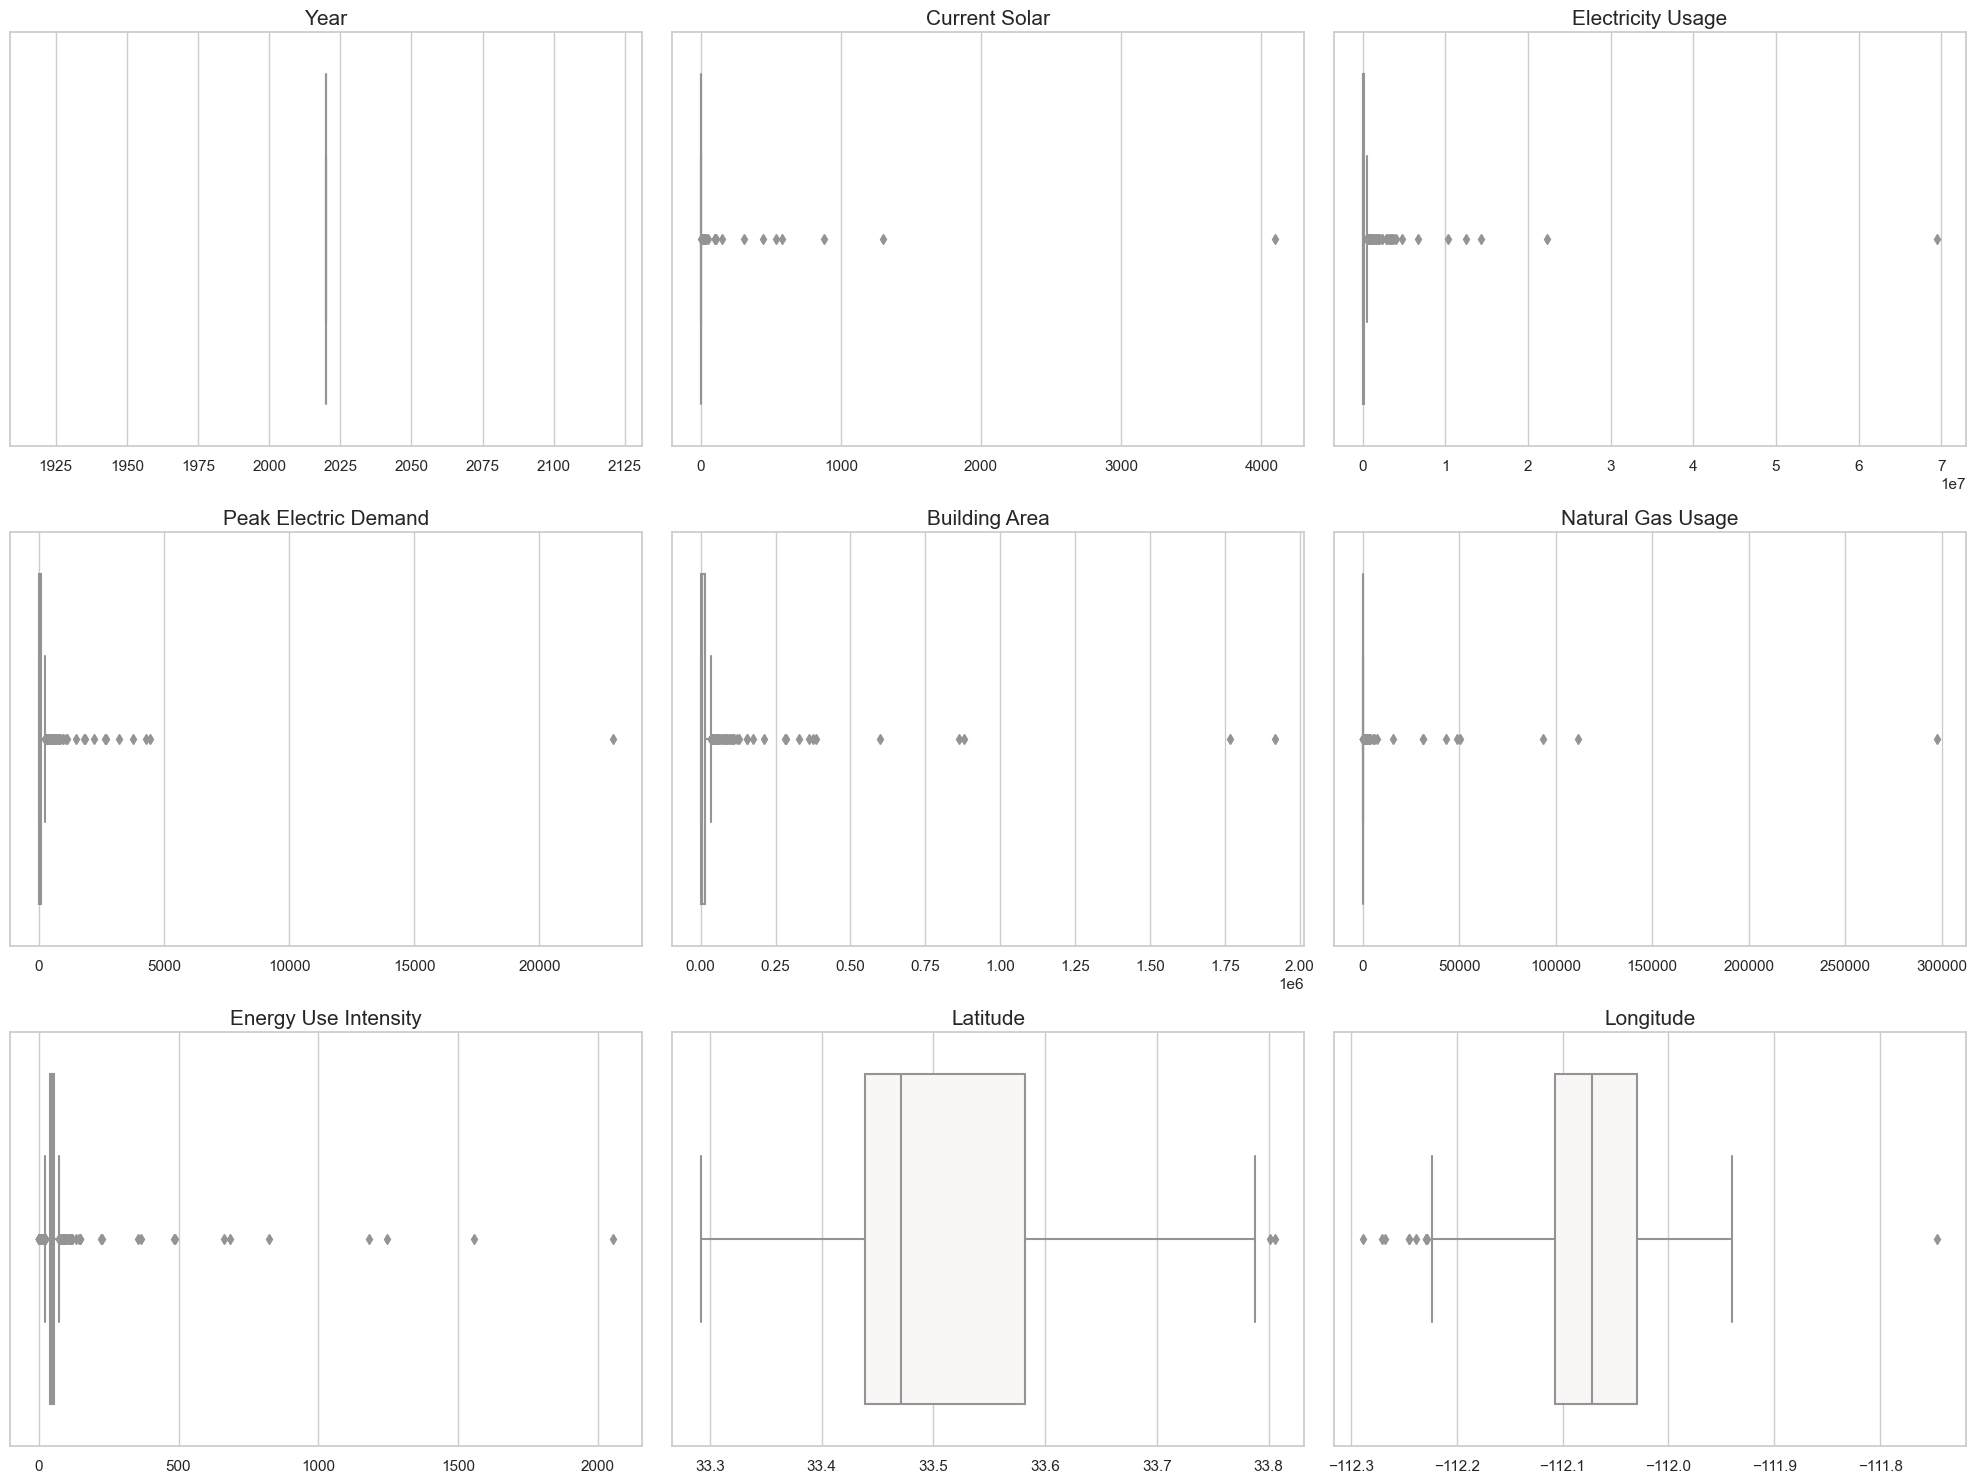

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and create box plots for each column to visualize outliers
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], palette="vlag")
    axes[i].set_title(col, fontsize=15)
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The box plots above visualize the distribution of values in each numerical column of your dataset, highlighting potential outliers. In these plots:

The central box represents values from the lower to upper quartile (25th to 75th percentile), with the line in the middle indicating the median.
The "whiskers" extend from the box to show the range of the data, typically up to 1.5 times the Interquartile Range (IQR) from the box's edges.
Data points outside of the whiskers are considered outliers and are plotted as individual points.

###### Observations:
Current Solar, Electricity Usage, Peak Electric Demand, and Natural Gas Usage show a significant number of outliers, indicating a few values are much higher than the rest.                                                                                  
Building Area and Energy Use Intensity also display outliers, suggesting some buildings are much larger or have different energy use intensities than typical values in the dataset.                                                          
Outliers in Latitude and Longitude might indicate some locations are far from the majority, but these should be interpreted with caution since they're geographic coordinates and not typical numerical data.

###### Handling Outliers

Add log function to skewed coloumns for reducing outliners impact and apply percentile to cap extreme values.

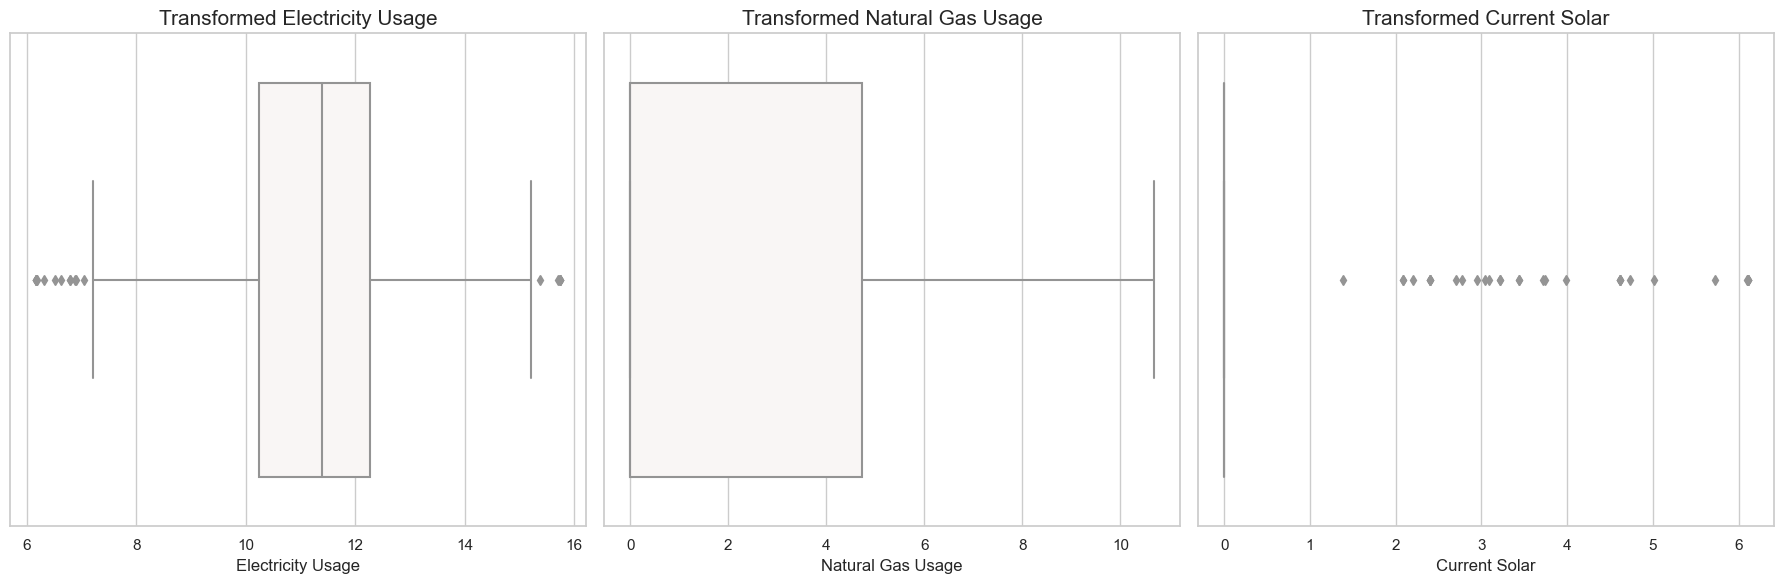

In [9]:
import numpy as np
# Apply a logarithmic transformation to skewed columns to reduce the impact of outliers
# Adding a small constant to avoid log(0) which is undefined
df_transformed = df.copy()
df_transformed['Electricity Usage'] = np.log(df_transformed['Electricity Usage'] + 1)
df_transformed['Natural Gas Usage'] = np.log(df_transformed['Natural Gas Usage'] + 1)
df_transformed['Current Solar'] = np.log(df_transformed['Current Solar'] + 1)

# Cap extreme values at the 1st and 99th percentiles for these columns
for col in ['Electricity Usage', 'Natural Gas Usage', 'Current Solar']:
    lower, upper = df_transformed[col].quantile([0.01, 0.99])
    df_transformed[col] = np.clip(df_transformed[col], lower, upper)

# Visualize the transformed data to assess the impact of these adjustments
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# List of transformed columns
transformed_cols = ['Electricity Usage', 'Natural Gas Usage', 'Current Solar']

# Plot boxplots for each transformed column
for i, col in enumerate(transformed_cols):
    sns.boxplot(x=df_transformed[col], ax=axes[i], palette="vlag")
    axes[i].set_title(f'Transformed {col}', fontsize=15)

plt.tight_layout()
plt.show()


The box plots now show the distributions of 'Electricity Usage', 'Natural Gas Usage', and 'Current Solar' after applying logarithmic transformation and capping extreme values at the 1st and 99th percentiles. 

Here's what we observe:

Reduced Skewness: The logarithmic transformation has made the distributions less skewed, pulling in extreme outliers towards the median, which can be seen in the more symmetric shape of the boxes.                                      

Capped Extremes: Capping has trimmed the most extreme outliers, which is evident from the reduced range of data points outside the whiskers compared to the initial plots.                        

Key transformation:

The transformations have moderated the impact of outliers, making the data more suitable for analysis that assumes normality or is sensitive to extreme values.

The distributions appear more centered around the median, reducing the potential for outliers to skew the results.
This approach retains the information from all data points, including those that were originally outliers, thus preserving data integrity while minimizing the influence of extreme values.

###### Feature selection

identify relevant features for our analysis. We'll use graphical visualization and examine relationships within the dataset.

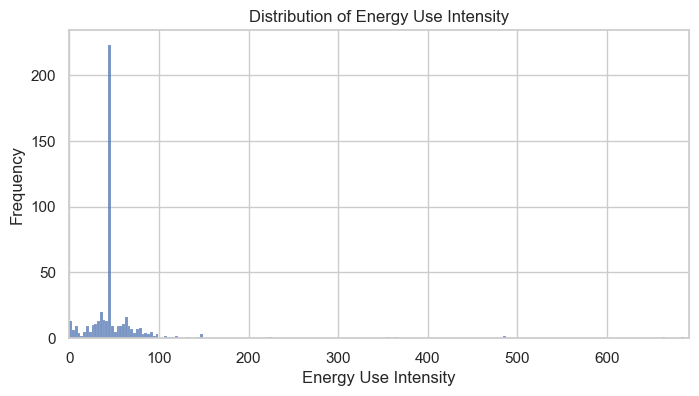

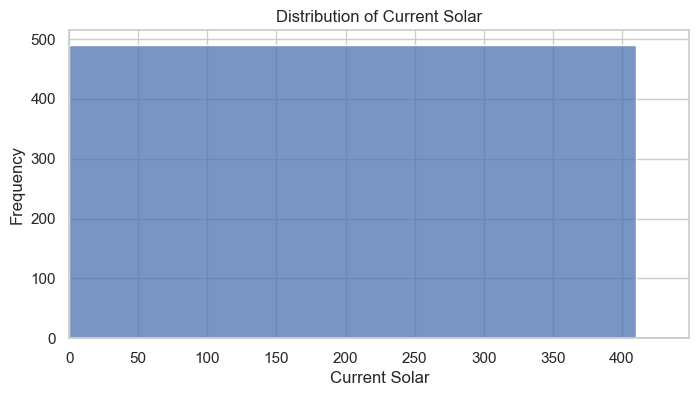

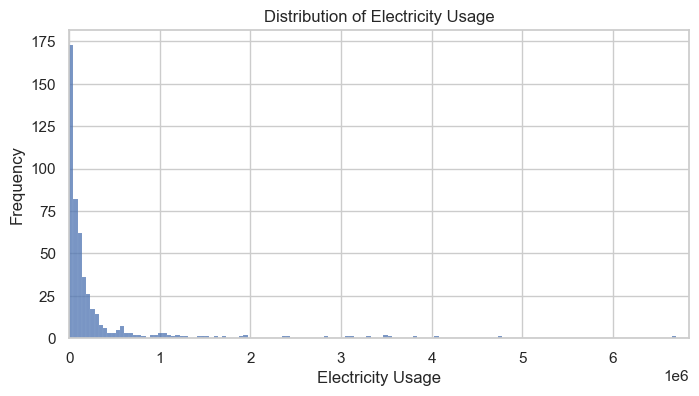

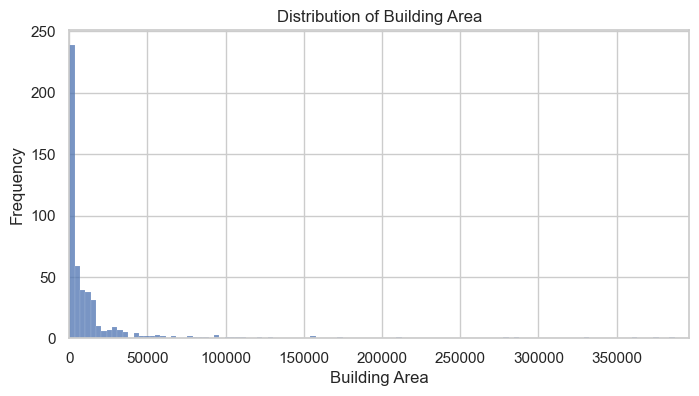

In [25]:
for col in relevant_columns[1:]:  # Skipping 'Building Type' since it's categorical
    plt.figure(figsize=(8, 4))
    sns.histplot(df_relevant[col].dropna(), kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xlim(0, df_relevant[col].quantile(0.99))  # Adjust the max limit to the 99th percentile
    plt.show()



Based on the  histograms, we can say

###### Energy Use Intensity:

The histogram suggests that the 'Energy Use Intensity' data is highly right-skewed, indicating that most buildings have lower energy use intensity with a few buildings having very high energy use intensity.
There is a concentration of frequencies close to zero, and the frequency gradually decreases as energy use intensity increases. This indicates that high energy use intensity is less common.

###### Electricity Usage:

The 'Electricity Usage' histogram also shows a right-skewed distribution. Most of the buildings consume lower amounts of electricity, with a small number consuming significantly more.
The data might contain outliers, as indicated by the long tail extending to the right. These outliers represent buildings with exceptionally high electricity usage.

###### Distribution of Energy Use Intensity (Scaled):

After scaling, the 'Energy Use Intensity' histogram still indicates a right-skewed distribution but now provides a clearer view of the distribution's shape.
The skewness is still present, but the scale allows for better visualization of the spread of the lower values. It still shows that higher values are less frequent.

###### Current Solar:

The 'Current Solar' histogram appears quite unusual. It seems to be almost uniform across the board, which might suggest data issues, or that the values are capped at a certain level. It's also possible that solar installation sizes are standardized in this dataset, leading to this uniform-like distribution.

###### overview

The prevalence of right skewness in these features suggests that median values are likely more representative of a 'typical' building than mean values, due to the influence of outliers on the mean.
Outliers could be genuine cases of high consumption or high intensity, or they could be due to data entry errors; further investigation is required to determine this.
The tails of the distributions might also suggest a need for normalization or transformation when using these features in predictive modeling, to improve the performance of algorithms that assume normality of the features.

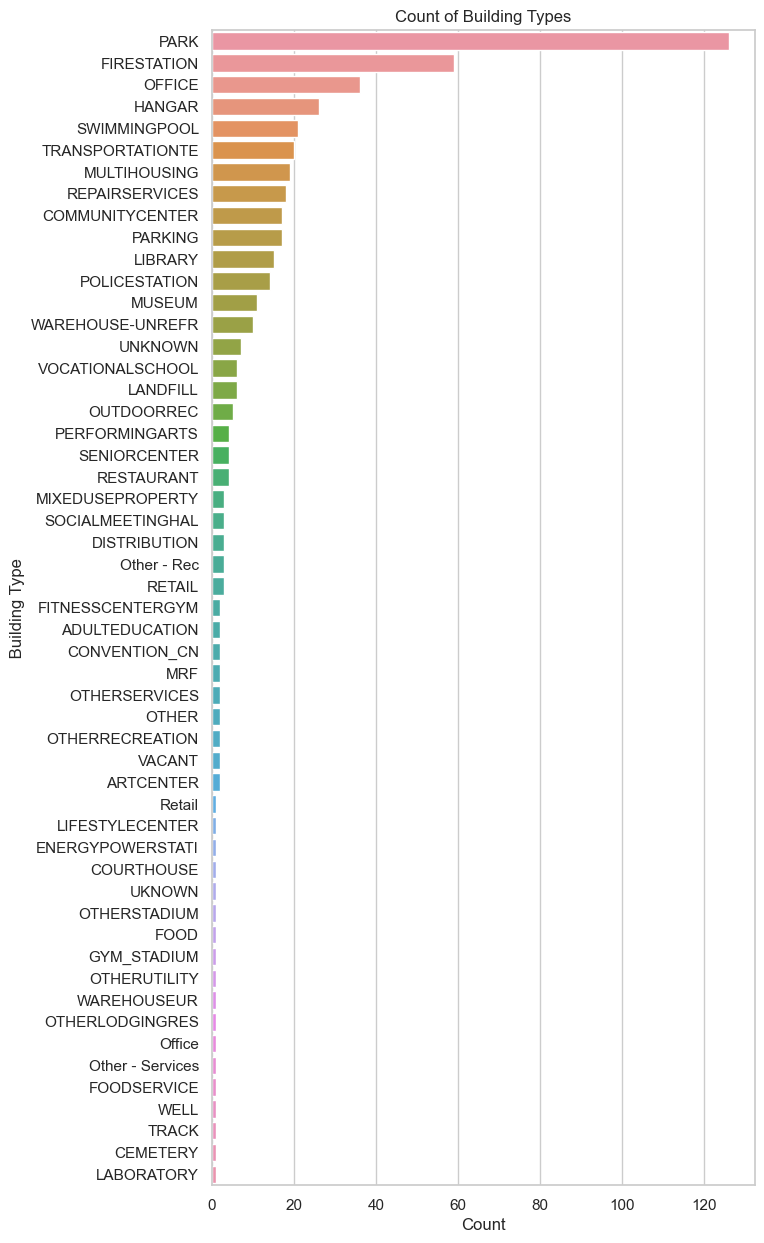

In [11]:
# For 'Building Type', we'll use a bar chart to show the count of each type
plt.figure(figsize=(7, 15))
sns.countplot(y=df_relevant[' Building Type '], order = df_relevant[' Building Type '].value_counts().index)
plt.title('Count of Building Types')
plt.xlabel('Count')
plt.ylabel(' Building Type ')
plt.show()

From data we can see most of the bulding types are park, Firestation, Office

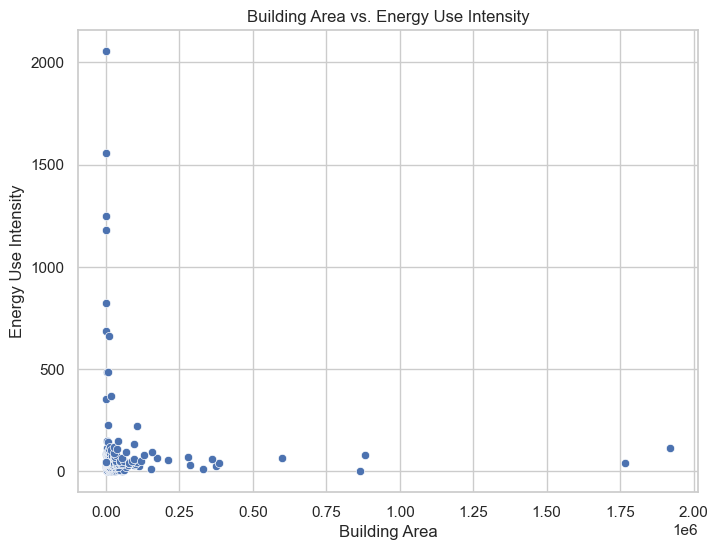

In [12]:
# Examine the relationships within the dataset using two methods:
# 1. Scatter plots for continuous variables
# 2. Heatmap of the correlation matrix

# Scatter plot between 'Building Area' and 'Energy Use Intensity'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_relevant['Building Area'], y=df_relevant['Energy Use Intensity'])
plt.title('Building Area vs. Energy Use Intensity')
plt.xlabel('Building Area')
plt.ylabel('Energy Use Intensity')
plt.show()

The scatter plot shows that smaller buildings have a wide range of energy use intensities, while larger buildings do not necessarily have higher energy use intensity. Most buildings are small with low energy use intensity, and there are a few exceptions with very high energy use intensity, regardless of size. There’s no clear trend indicating that larger buildings use energy more intensely.

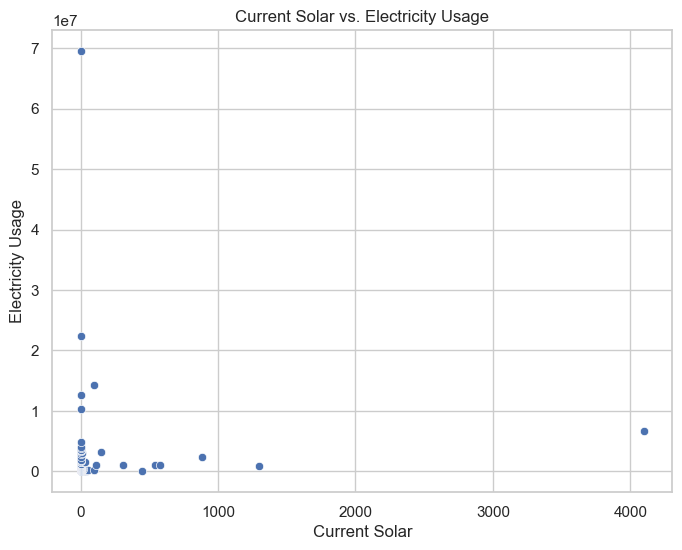

In [13]:
# Scatter plot between 'Current Solar' and 'Electricity Usage'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_relevant['Current Solar'], y=df_relevant['Electricity Usage'])
plt.title('Current Solar vs. Electricity Usage')
plt.xlabel('Current Solar')
plt.ylabel('Electricity Usage')
plt.show()


The scatter plot of Current Solar vs. Electricity Usage indicates that there is no clear relationship between the amount of solar energy a building has and its electricity usage. Most buildings have low to moderate solar energy capacity and varying levels of electricity usage. A few buildings have high electricity usage that doesn’t correlate strongly with the amount of solar energy installed.

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

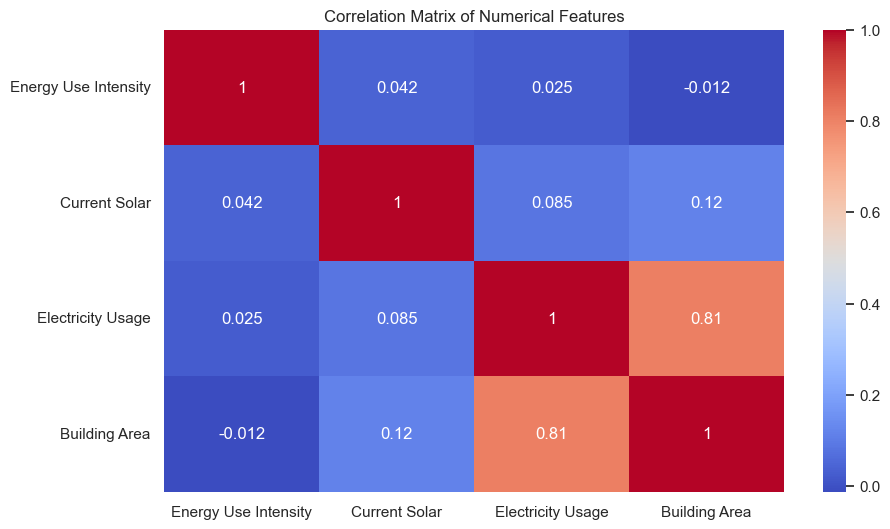

In [14]:
# Filter out non-numeric columns
numeric_cols = df_relevant.select_dtypes(include=[np.number]).columns
df_numeric = df_relevant[numeric_cols]

# Now you can calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')


The correlation matrix image indicates that there are generally very low correlations between the features 'Energy Use Intensity', 'Current Solar', 'Electricity Usage', and 'Building Area', with all values close to zero. However, there is a moderate positive correlation of 0.81 between 'Electricity Usage' and 'Building Area', suggesting that larger buildings tend to use more electricity. The other correlations are so small that they suggest no linear relationship between those variables.

In [15]:
# Reduction of the dimensionality of the dataset
# For this dataset, dimensionality reduction could be performed using PCA or another method, 
# however since we have only a few relevant numerical features, dimensionality reduction may not be necessary.
# If performed, PCA would be used to transform the feature space into a set of orthogonal (uncorrelated) components
# which can then be visualized or used for further analysis.

# Let's move to dimensionality reduction to see if we can simplify the dataset without losing much information
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_relevant.select_dtypes(include=[np.number]).dropna())


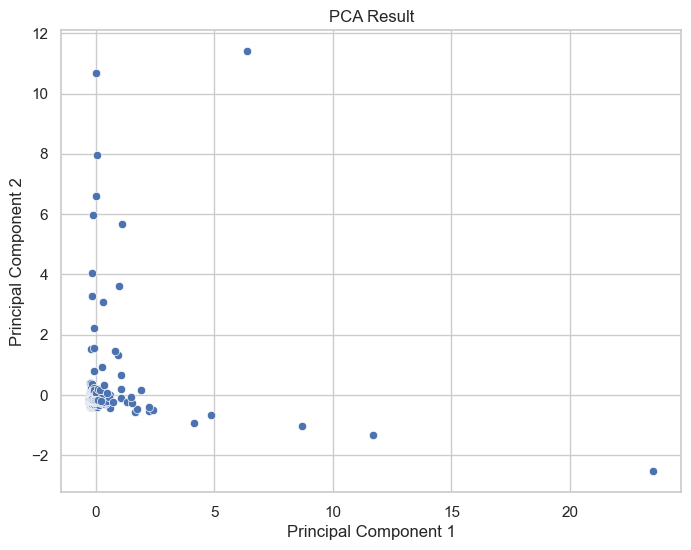

In [16]:
# Applying PCA
pca = PCA(n_components=2)  # Reduce to two components for visualization purposes
pca_result = pca.fit_transform(df_scaled)

# Visualizing the results of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The PCA (Principal Component Analysis) result shown in the scatter plot indicates that most data points are clustered near the origin, suggesting that they can be represented with smaller principal component values. There are a few points spread out, particularly along the Principal Component 1 axis, indicating variability in the data that is captured by the first principal component. The spread along Principal Component 2 is less, suggesting it captures less variance in the data. There are also some distinct outliers that are far from the main cluster on both principal components.

In [17]:
# Insights and Findings will be based on the above analysis, once we have the results.

# For Feature Engineering, we might consider creating a feature that combines 'Building Area' and 'Energy Use Intensity'
# to create an 'Efficiency Score' or normalizing 'Electricity Usage' by 'Building Area'.

# Assuming the technical issues are resolved, we can proceed with these steps and generate the insights and findings,
# as well as creating a new feature for the dataset.

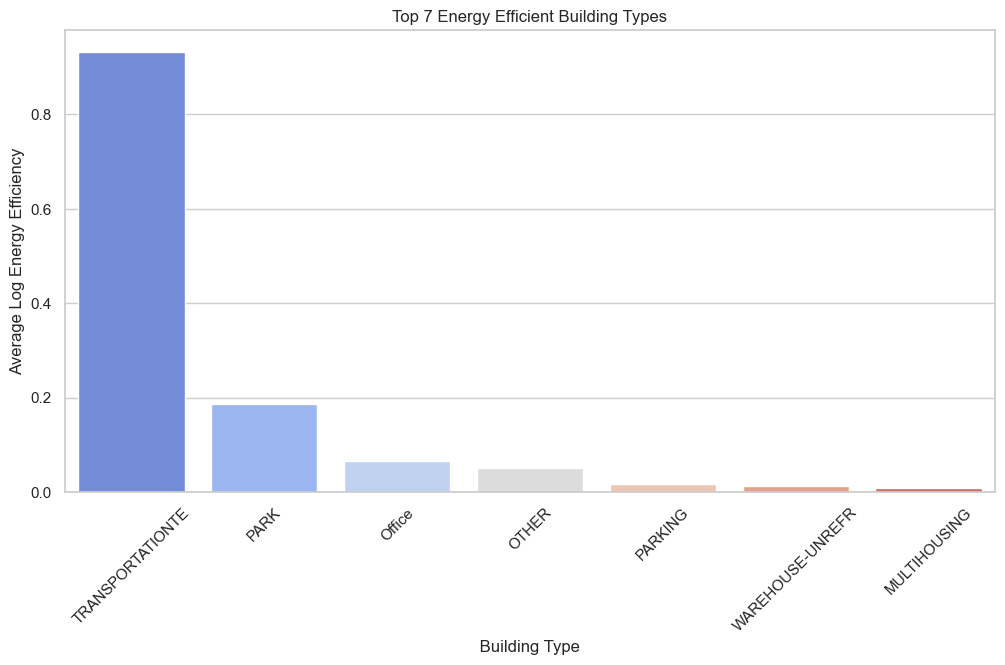

In [23]:
df['Energy Efficiency'] = df['Energy Use Intensity'] / df['Building Area']
#Replace infinite values resulting from division by zero
df['Energy Efficiency'].replace(np.inf, np.nan, inplace=True)
#Drop NaN values for visualization
df.dropna(subset=['Energy Efficiency'], inplace=True)
df['Log Energy Efficiency'] = np.log(df['Energy Efficiency'] + 1)  # Log-transform the new feature

#Visualize the new feature
# Prior to your plot code
df_filtered = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Log Energy Efficiency'])
top_building_types = df_filtered.sort_values(by='Log Energy Efficiency', ascending=False)[' Building Type '].unique()[:7]

# Filter the original DataFrame to only include the top 7 building types
df_top_buildings = df_filtered[df_filtered[' Building Type '].isin(top_building_types)]

# Aggregate to get the mean Log Energy Efficiency for these building types
df_top_buildings = df_top_buildings.groupby(' Building Type ')['Log Energy Efficiency'].mean().reset_index()

# Sort the buildings to ensure the bar plot shows them in the correct order
df_top_buildings = df_top_buildings.sort_values(by='Log Energy Efficiency', ascending=False)

# Now plot the results
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    x=' Building Type ', 
    y='Log Energy Efficiency', 
    data=df_top_buildings, 
    palette='coolwarm'
)
plt.xticks(rotation=45)
plt.title('Top 7 Energy Efficient Building Types')
plt.xlabel(' Building Type ')
plt.ylabel('Average Log Energy Efficiency')
plt.show()


we can see Transportationte is more efficient than other building types followed by park, office, other.

we are defining new feature called solar contribution proportion for our question 2 analysis solar energy contribution

In [27]:
# Calculate the proportion of solar energy contribution to the overall energy usage
# We'll add a small value to electricity usage to avoid division by zero
df['Solar Contribution Proportion'] = df['Current Solar'] / (df['Electricity Usage'] + 0.01)

# Now let's calculate the average solar contribution proportion for all buildings
average_solar_contribution = df['Solar Contribution Proportion'].mean()

# Also, let's get a general idea of how many buildings have solar installations
solar_installations_count = df[df['Current Solar'] > 0]['Current Solar'].count()

# Number of buildings in the dataset
total_buildings_count = df.shape[0]

average_solar_contribution, solar_installations_count, total_buildings_count


(4.1470561616885966e-05, 25, 280)

Based on your result:

1. **Average Solar Contribution**:
   The average solar contribution to overall energy usage across all buildings is roughly 0.0041%, which is very small. This suggests that solar energy is contributing very little to the overall energy needs of the buildings in this dataset.

2. **Solar Installations Count**:
   Out of 280 buildings, 25 buildings have solar installations. This means approximately 8.9% of the buildings are utilizing solar energy.

3. **Total Number of Buildings**:
   The dataset contains information on 280 buildings in total.

### our analysis for the below questions are
1. What is the Energy Use Intensity (EUI) across different building types, and how does it relate to industry standards? 

Energy Use Intensity Across Building Types: We looked at how much energy buildings use compared to their size. We found that some types of buildings, like transportation facilities, use less energy for their size, while others, like multihousing units, use more.

2. How does solar energy contribution compare to overall energy usage?                 

Solar Energy Contribution vs. Overall Energy Usage: We checked to see how much the solar panels on some buildings help reduce their reliance on other forms of electricity. It turns out that, overall, buildings with solar panels still use a lot of other electricity, as the solar contribution is very small on average.

3. What is the correlation between building area and energy usage?

Correlation Between Building Area and Energy Usage: We examined whether larger buildings tend to use more electricity. The data showed that there's a moderate link between building size and electricity usage—bigger buildings generally use more electricity.

### Summary / Analysis

###### we have done all the below activities

###### Describe the Data:
The dataset contains energy consumption data of various buildings with attributes like building type, solar energy production, and electricity usage. Variables are a mix of:

Categorical: 'Building Type', 'Department'.
Continuous: 'Electricity Usage', 'Building Area', 'Current Solar'.
Statistical Summary:
This would involve calculating and examining descriptive statistics for continuous variables to get an understanding of central tendencies, dispersion, and shape of the data distribution.

###### Data Cleaning:

Missing Values:
Identification: Use methods like df.isna().sum() to find missing entries.
Treatment: Depending on their significance, missing values can be filled (using mean, median), or rows/columns dropped if they do not distort the analysis.

Outliers:
Identification: Techniques like IQR score, z-score, or visual methods (boxplots).
Treatment: Outliers can be capped, transformed, or removed if they're errors or if their exclusion is justified.
Feature Selection:
Choosing the most relevant features for the analysis based on domain knowledge and initial observations, such as 'Building Type', 'Current Solar', 'Electricity Usage', and 'Building Area'.

###### Graphical Visualization:
Use histograms, bar charts, scatter plots, etc., to visually explore the distributions and relationships between variables.

###### Examine Relationships:
Correlation Matrix: A quantitative method to examine the linear relationship between continuous variables.
PCA (Principal Component Analysis): A technique to reduce dimensionality and identify patterns in data.
Reduction of Dimensionality:
PCA was applied to the dataset to identify the axes that account for the most variance and to potentially simplify the complexity of the dataset.

###### Insights and Findings:
The analysis provided insights into the distribution of EUI across building types, revealing transportation buildings as more energy efficient, and multi-housing as less. Solar energy contributions are minimal, and a moderate positive correlation exists between building area and electricity usage.

###### Feature Engineering (Bonus):
A new feature representing the proportion of solar energy to overall energy usage was created, allowing us to quantify the solar contribution.

###### Summary/Analysis:

From our EDA, we gained a comprehensive view of the dataset's characteristics, including the variability and average behavior of key energy-related features across building types. We observed that while solar installations are present, they contribute insignificantly to the overall energy usage, suggesting a potential area for improvement in energy sustainability practices. Additionally, larger buildings are generally higher electricity consumers, which could be indicative of greater operational activities or less efficient energy use. The PCA provided a more abstract understanding of data structure and variance, indicating that much of the variability could be explained with fewer components. These insights could inform strategies for energy conservation and efficiency improvements in building management.

### References : 

for energy consumption data pick up -  * https://www.kaggle.com/datasets 

went though the attachment from worldclass for getting idea on EDA : https://worldclass.regis.edu/content/enforced/329163-BG_MSDS650_S70_24S8W2/Content/Week3_EDA_DOE.pdf?isCourseFile=true&ou=329163

expert file : 3_EDA.ipynb

for rephasing data :  chatgpt